In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline


In [2]:
df = pd.read_csv('Customer Churn.csv')

In [3]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [4]:
df.tail()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.98,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.21,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.32,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.64,0
3149,8,1,11,2,1792,25,7,9,3,1,1,30,100.68,1


In [5]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [7]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

<Axes: >

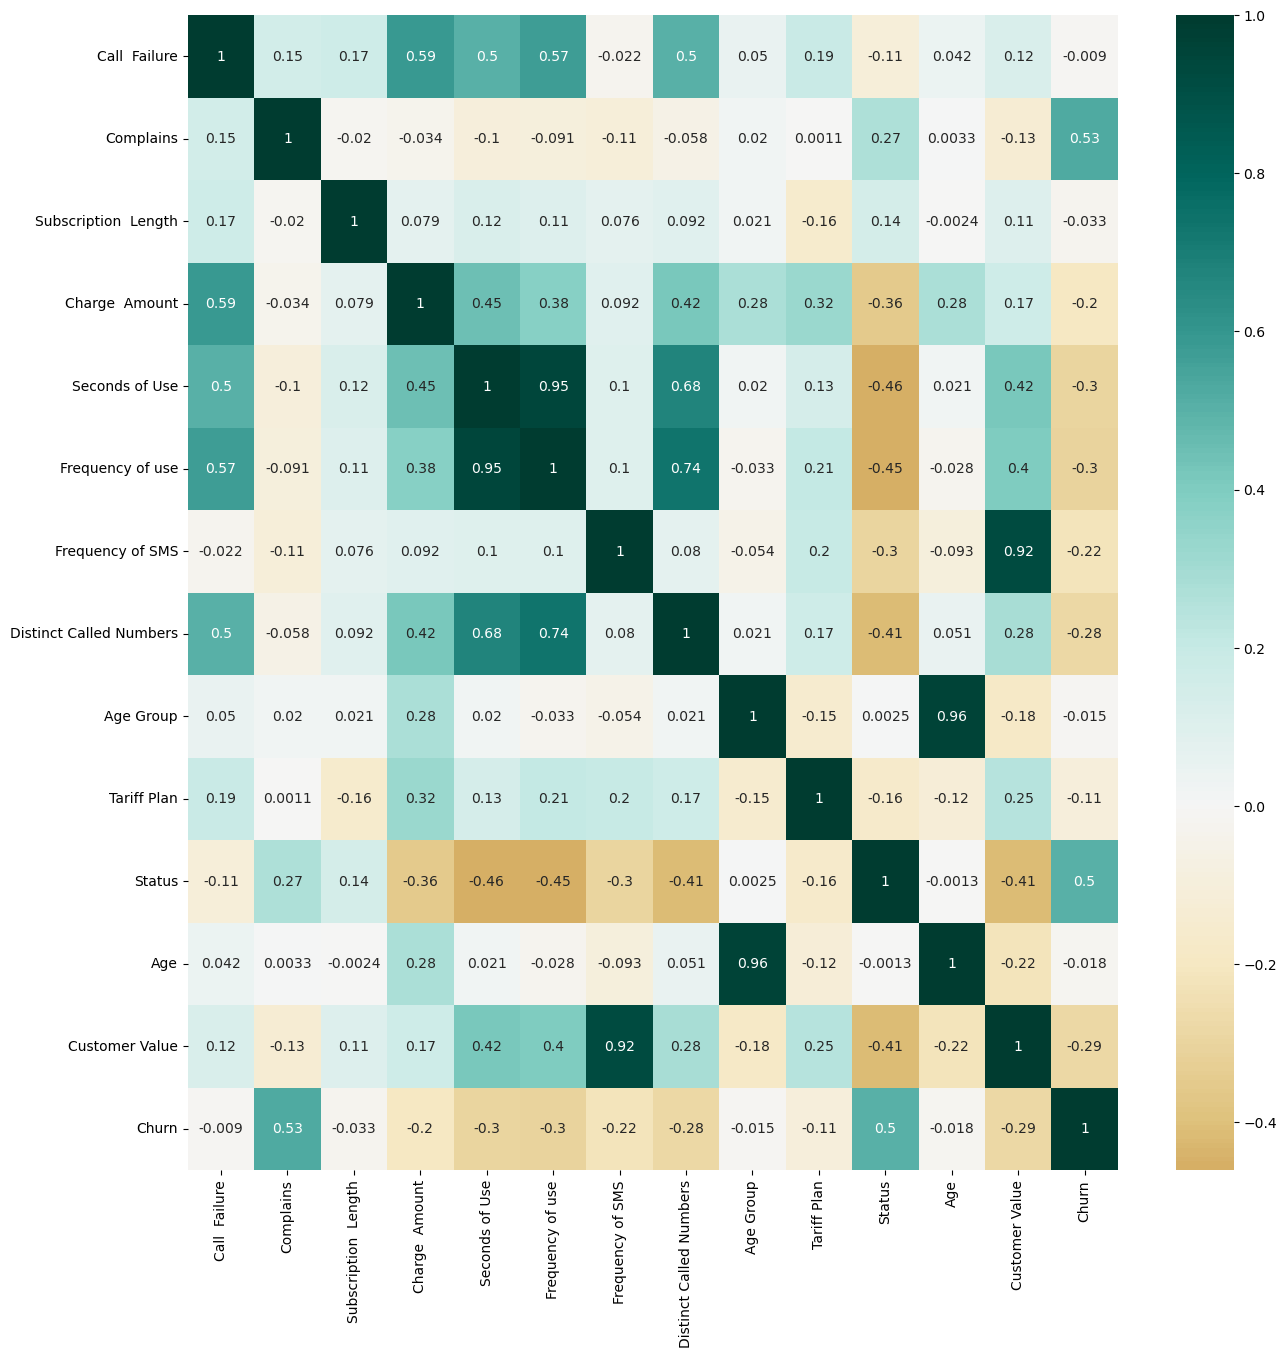

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

<Axes: >

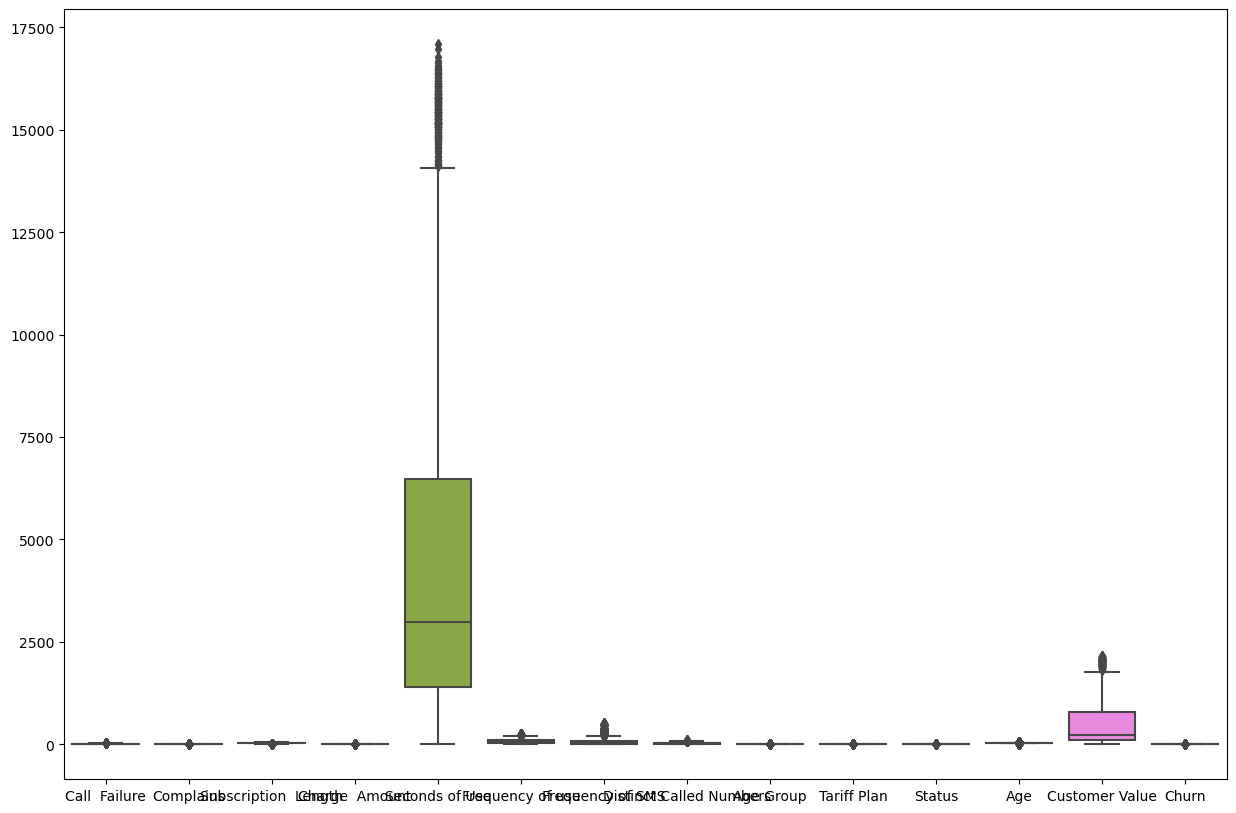

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

(array([403., 368., 334., 345., 294., 190., 169.,  57., 117., 198., 133.,
         38.,  47.,  71.,  30.,  41.,  40.,  21.,   4.,  24.,  35.,  35.,
         81.,  63.,  12.]),
 array([    0. ,   683.6,  1367.2,  2050.8,  2734.4,  3418. ,  4101.6,
         4785.2,  5468.8,  6152.4,  6836. ,  7519.6,  8203.2,  8886.8,
         9570.4, 10254. , 10937.6, 11621.2, 12304.8, 12988.4, 13672. ,
        14355.6, 15039.2, 15722.8, 16406.4, 17090. ]),
 <BarContainer object of 25 artists>)

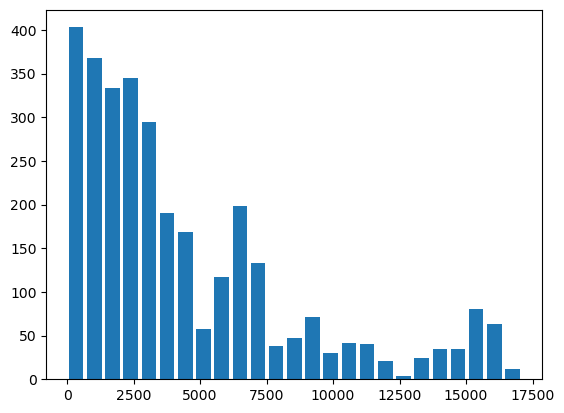

In [12]:
plt.hist(df['Seconds of Use'],bins=25,rwidth = 0.8)

In [10]:
z_score = np.abs((df['Complains'] - df['Complains'].mean()) / df['Complains'].std())
threshold = 3
df = df[(z_score<3)&(z_score>-3)]

In [12]:
z_score = np.abs((df['Status'] - df['Status'].mean()) / df['Status'].std())
threshold = 3
df = df[(z_score<3)&(z_score>-3)]

In [13]:
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,7,0,20,1,2000,32,35,16,3,1,1,30,221.280,0
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0


<Axes: xlabel='Complains', ylabel='Charge  Amount'>

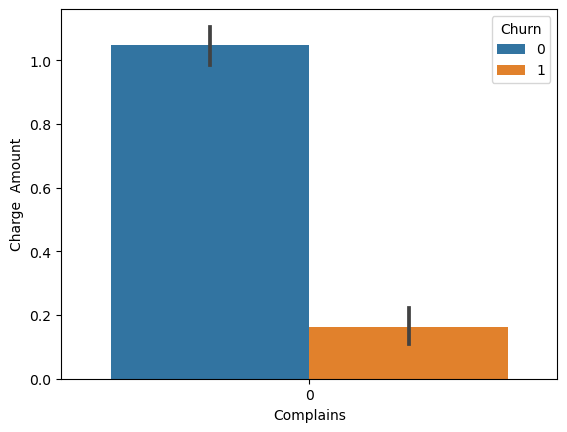

In [16]:
sns.barplot(x = 'Complains',y = 'Charge  Amount',hue = 'Churn',data = df)

<Axes: >

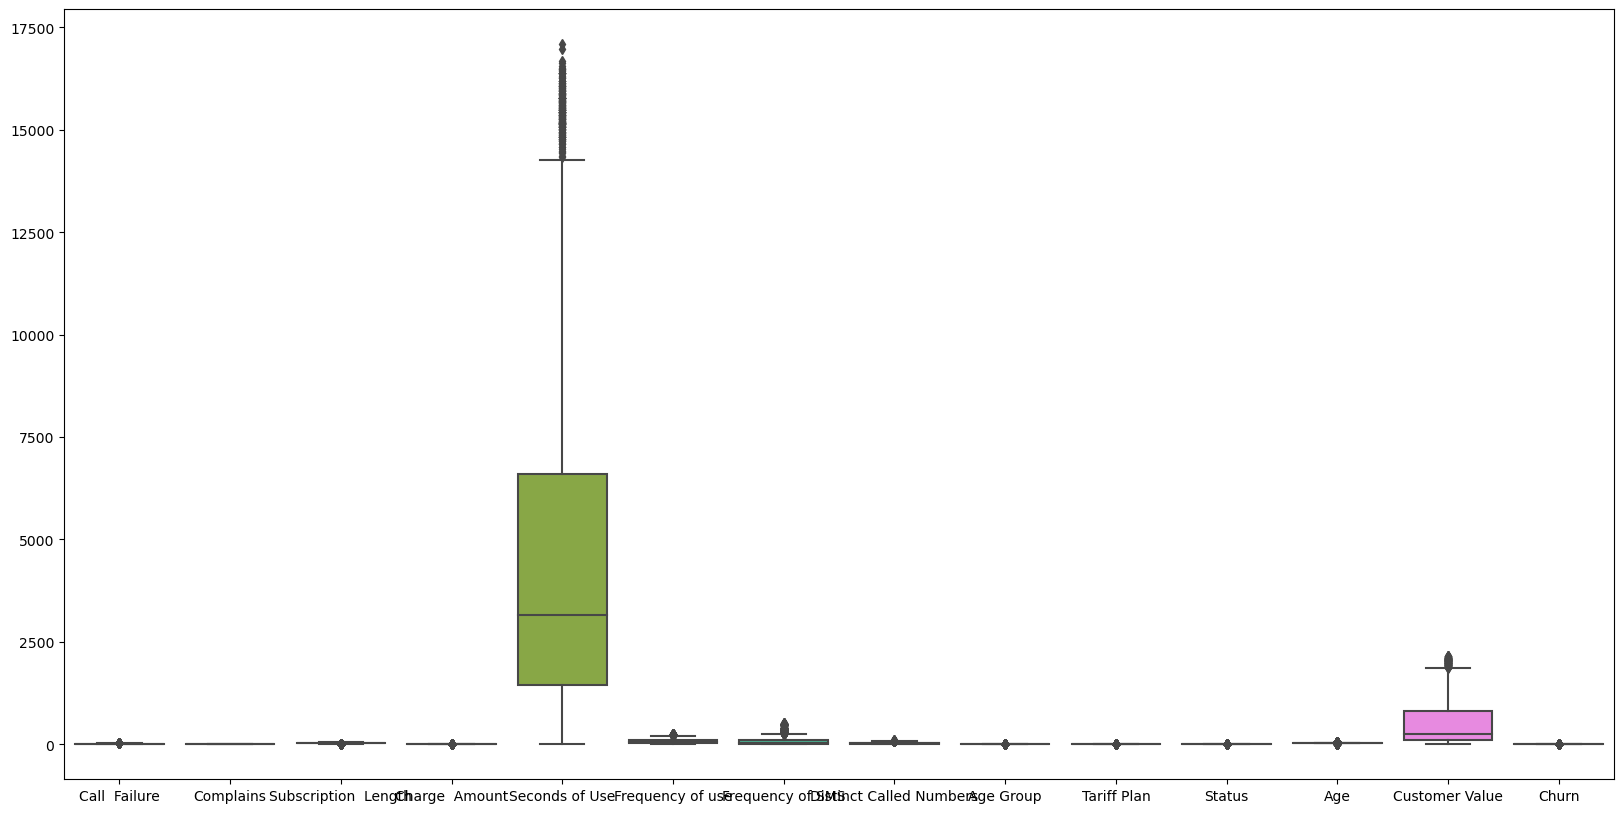

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(df)

In [24]:
X = df.drop('Churn',axis = 1)

In [25]:
X.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805


In [29]:
Y = df['Churn']

In [30]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3144    0
3145    0
3146    0
3147    0
3148    0
Name: Churn, Length: 2909, dtype: int64

<Axes: >

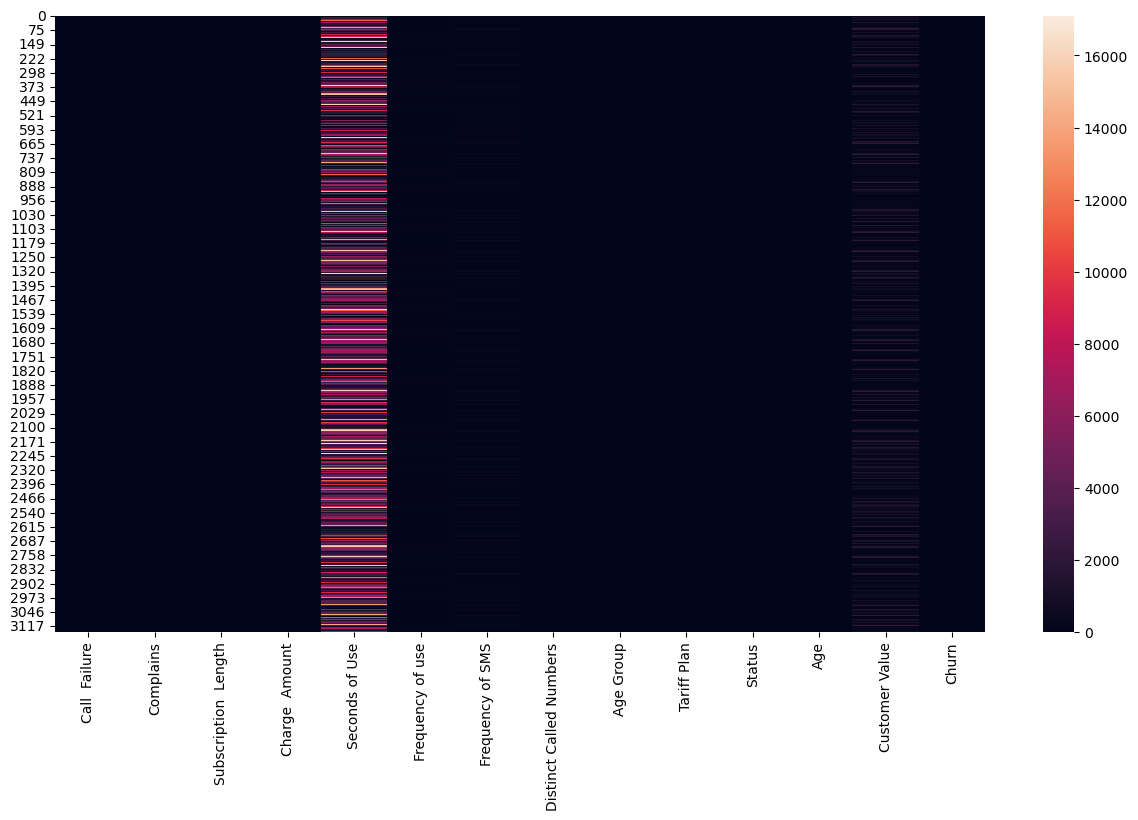

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(df)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1)

def Master(model, model_name):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acuracy = accuracy_score(y_test, y_pred)
    print(model_name, " : ", acuracy)


In [34]:
classifier = KNeighborsClassifier(n_neighbors = 5)

pipe = [('standard_Scaler',StandardScaler()),('classifier',classifier)]
pipe = Pipeline(pipe)

In [35]:
Master(pipe,'KNN')

KNN  :  0.9621993127147767


In [36]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [37]:
cv =  GridSearchCV(classifier,param_grid,cv = 5)
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [38]:
y_pred =cv.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred)

0.9175257731958762

In [40]:
cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}